# FINANCIAL INCLUSION IN AFRICA

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In [37]:
 pwd

'C:\\Users\\Admin\\Desktop\\R projects\\Financial inclusion in Africa'

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 50)

In [39]:
train = pd.read_csv('Train_v2.csv')
test = pd.read_csv('Test_v2.csv')
test_copy=test.copy()

In [40]:
data = pd.concat([train, test], axis=0)
data.drop('uniqueid', inplace=True, axis=1)
data

,age_of_respondent,bank_account,cellphone_access,country,education_level,gender_of_respondent,household_size,job_type,location_type,marital_status,relationship_with_head,year
0,24,Yes,Yes,Kenya,Secondary education,Female,3,Self employed,Rural,Married/Living together,Spouse,2018
1,70,No,No,Kenya,No formal education,Female,5,Government Dependent,Rural,Widowed,Head of Household,2018
2,26,Yes,Yes,Kenya,Vocational/Specialised training,Male,5,Self employed,Urban,Single/Never Married,Other relative,2018
3,34,No,Yes,Kenya,Primary education,Female,5,Formally employed Private,Rural,Married/Living together,Head of Household,2018
4,26,No,No,Kenya,Primary education,Male,8,Informally employed,Urban,Single/Never Married,Child,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,62,NaN,No,Uganda,Primary education,Female,2,Self employed,Rural,Married/Living together,Spouse,2018
10082,42,NaN,Yes,Uganda,Primary education,Male,8,Self employed,Urban,Married/Living together,Head of Household,2018
10083,39,NaN,Yes,Uganda,Secondary education,Male,1,Other Income,Urban,Single/Never Married,Head of Household,2018
10084,28,NaN,Yes,Uganda,Primary education,Female,6,Self employed,Rural,Married/Living together,Spouse,2018


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 12 columns):
age_of_respondent         33610 non-null int64
bank_account              23524 non-null object
cellphone_access          33610 non-null object
country                   33610 non-null object
education_level           33610 non-null object
gender_of_respondent      33610 non-null object
household_size            33610 non-null int64
job_type                  33610 non-null object
location_type             33610 non-null object
marital_status            33610 non-null object
relationship_with_head    33610 non-null object
year                      33610 non-null int64
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


# Continuous data
## Age of respondent

In [42]:
print(data['age_of_respondent'].describe())

count    33610.000000
mean        38.656114
std         16.447127
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64


In [43]:
print('Null values: ', data['age_of_respondent'].isnull().any())

Null values:  False


Text(0.5, 1.0, 'Distributon of every age respondent')

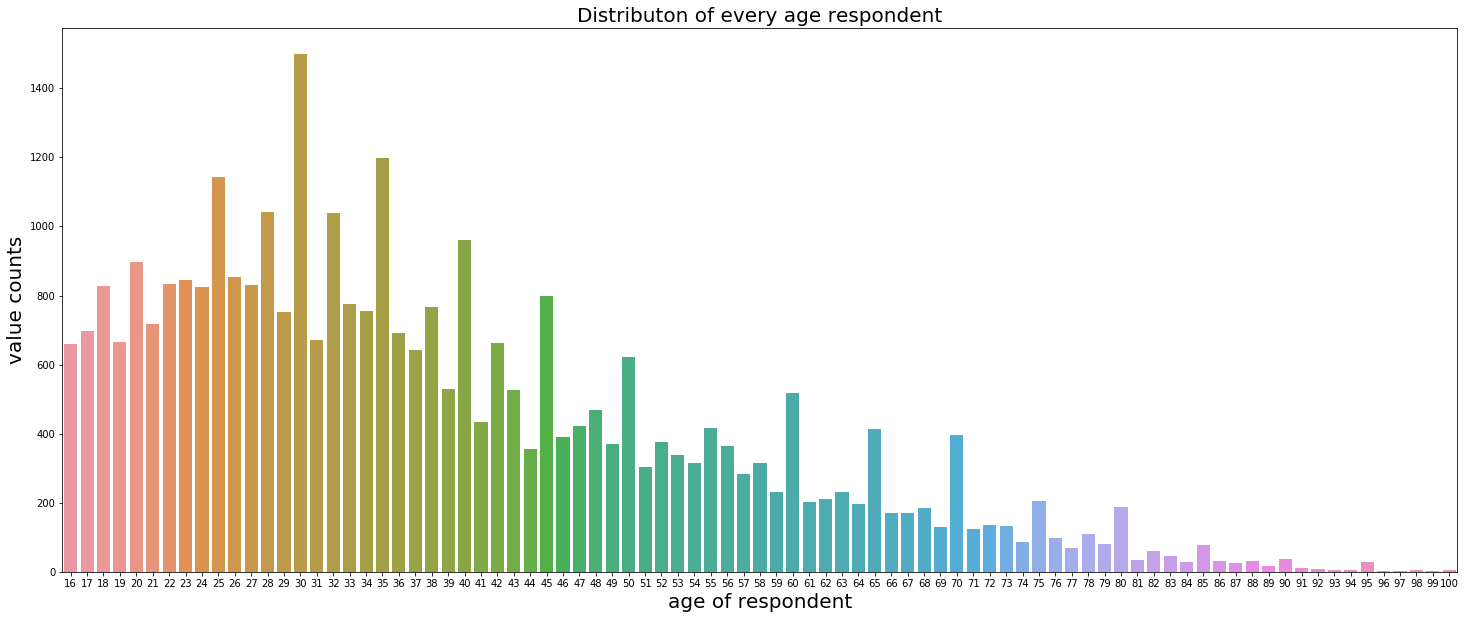

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(25,10)
sns.countplot(x='age_of_respondent', data=data)
ax.set_xlabel('age of respondent', fontsize=20)
ax.set_ylabel('value counts', fontsize=20)
ax.set_title('Distributon of every age respondent', fontsize=20)

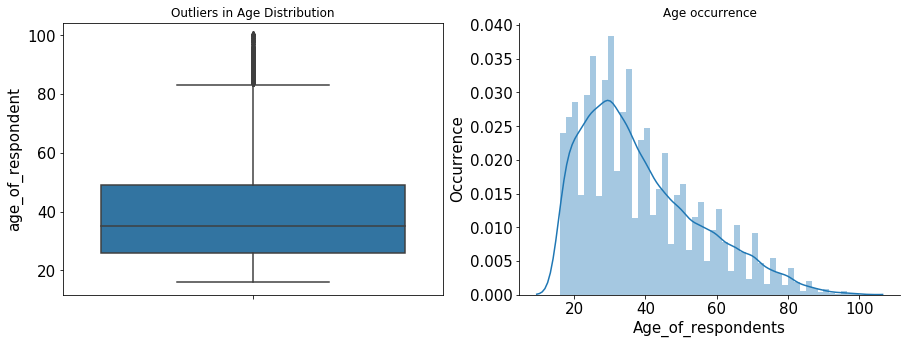

In [45]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.boxplot(x='age_of_respondent',data=data,orient='v',ax=ax1)
ax1.set_xlabel(' ',fontsize=15)
ax1.set_ylabel('age_of_respondent',fontsize=15)
ax1.set_title('Outliers in Age Distribution')
ax1.tick_params(labelsize=15)

sns.distplot(data['age_of_respondent'],ax=ax2)
ax2.set_xlabel('Age_of_respondents',fontsize=15)
ax2.set_ylabel('Occurrence',fontsize=15)
ax2.set_title("Age occurrence")
sns.despine(ax=ax2)
ax2.tick_params(labelsize=15)

In [46]:
q1 = data['age_of_respondent'].describe()[4]
q3 = data['age_of_respondent'].describe()[6]
IQR = q3 - q1 #interquantile range
lower =  q1 - (IQR*1.5)# lower bound
upper = q3 + (IQR*1.5) #upper bound
# q1, q3= np.percentile(dataset,[25,75])
# iqr = q3 - q1
# lower_bound = q1 -(1.5 * iqr) 
# upper_bound = q3 +(1.5 * iqr) 
print('Upper bound: ', upper, '\nLower bound: ', lower)

Upper bound:  83.5 
Lower bound:  -8.5


In [47]:
print('Number of outliers: ', data[data['age_of_respondent']>=83.5]['age_of_respondent'].count())

Number of outliers:  327


## Household size

In [48]:
print(data['household_size'].describe(), '\nNull values: ', data['household_size'].isnull().any())

count    33610.000000
mean         3.791877
std          2.223138
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64 
Null values:  False


Text(0.5, 1.0, 'Frequency distribution of house hold size')

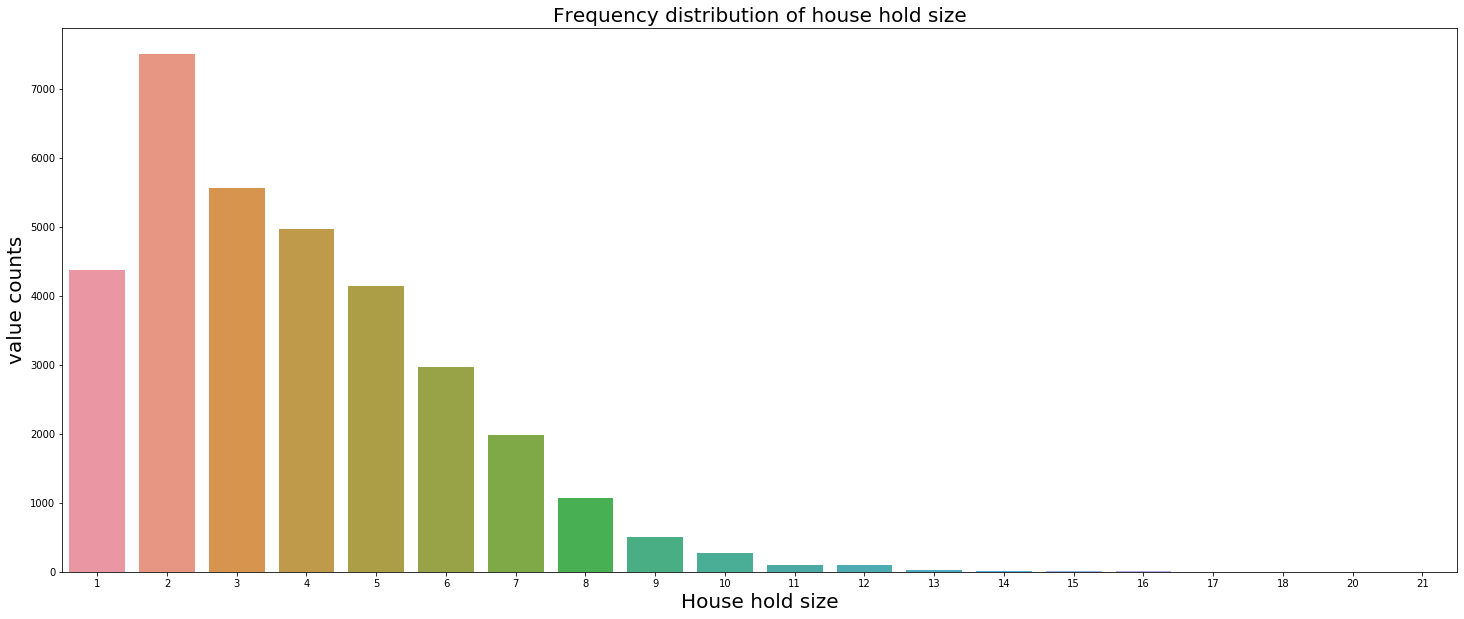

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(25,10)
sns.countplot(x='household_size', data=data)
ax.set_xlabel('House hold size', fontsize=20)
ax.set_ylabel('value counts', fontsize=20)
ax.set_title('Frequency distribution of house hold size', fontsize=20)

# Categorical data

In [50]:
# function to automate categorical plots
def cat_plot(var, x_label_rotation=0):
    fig, ax = plt.subplots()
    fig.set_size_inches(20,5)
    sns.countplot(x=var, data=data)
    ax.set_xlabel(var, fontsize=20)
    ax.set_ylabel('value counts', fontsize=20)
    ax.set_title('Frequency distribution of ' + var, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=x_label_rotation)

## 1. Cellphone Access

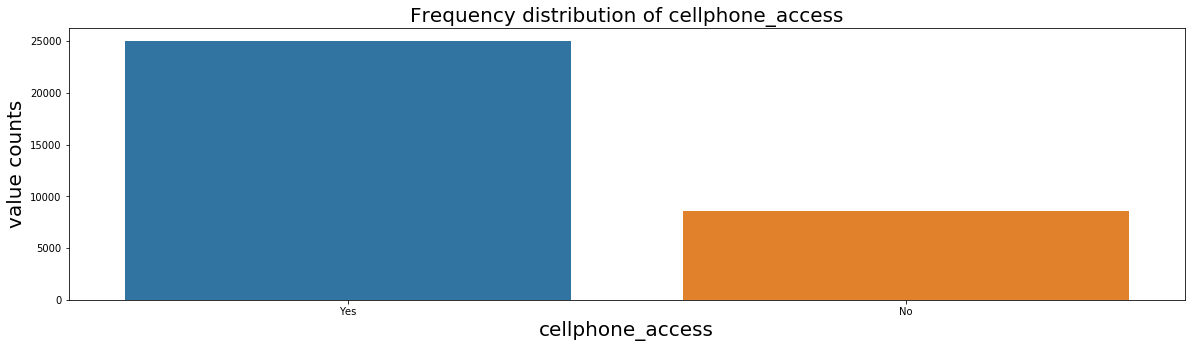

In [51]:
cat_plot('cellphone_access')

## 2. Country

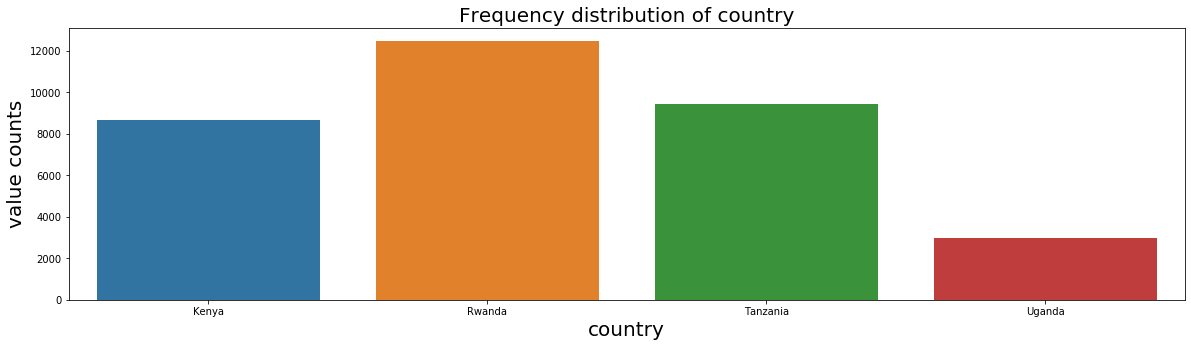

In [52]:
cat_plot('country')

## 3. Education Level

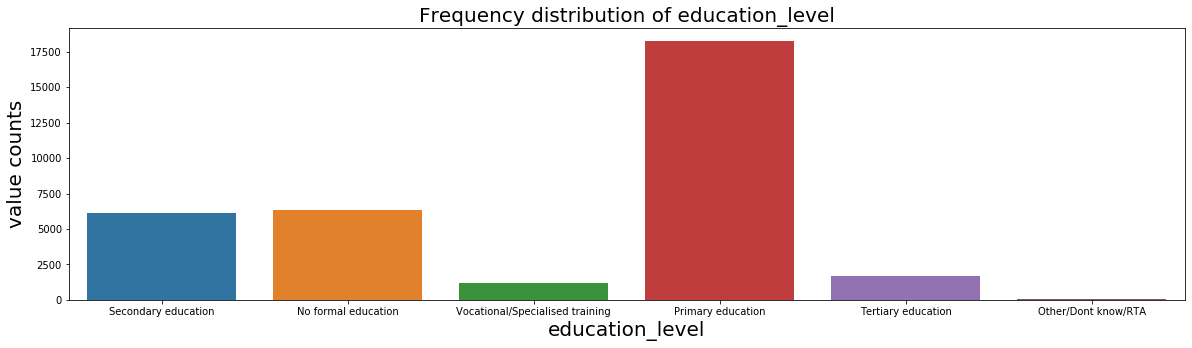

In [53]:
cat_plot('education_level')

## 4. Gender of respondent

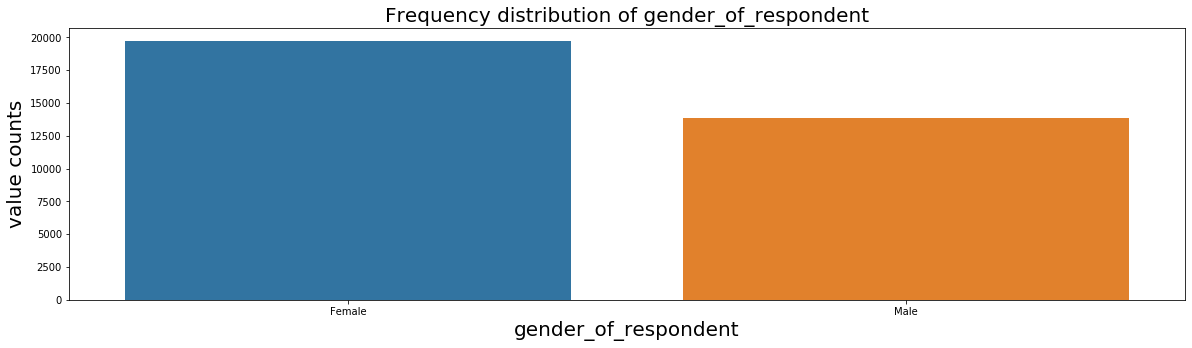

In [54]:
cat_plot('gender_of_respondent')

## 5. Job Type

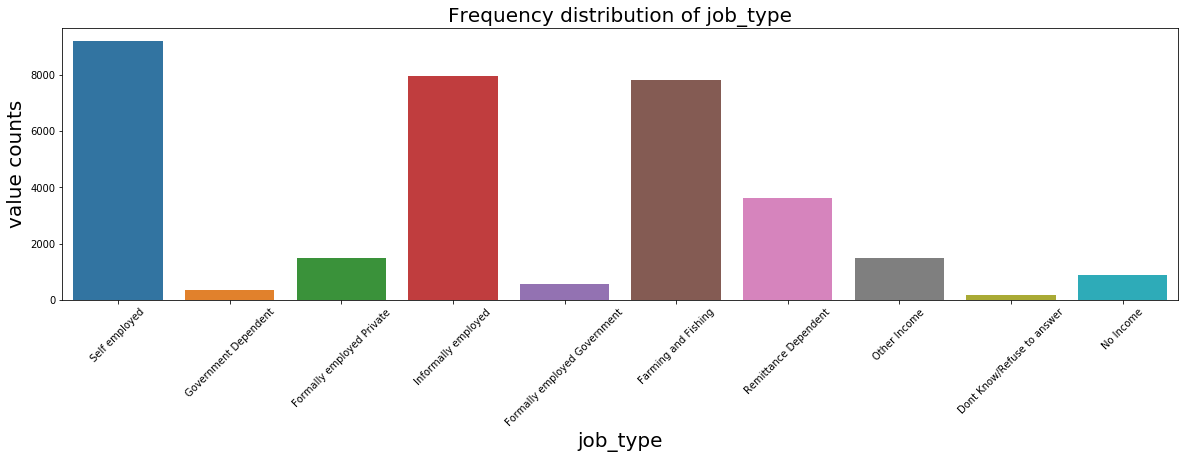

In [55]:
cat_plot('job_type', 45)

## 6. Location Type

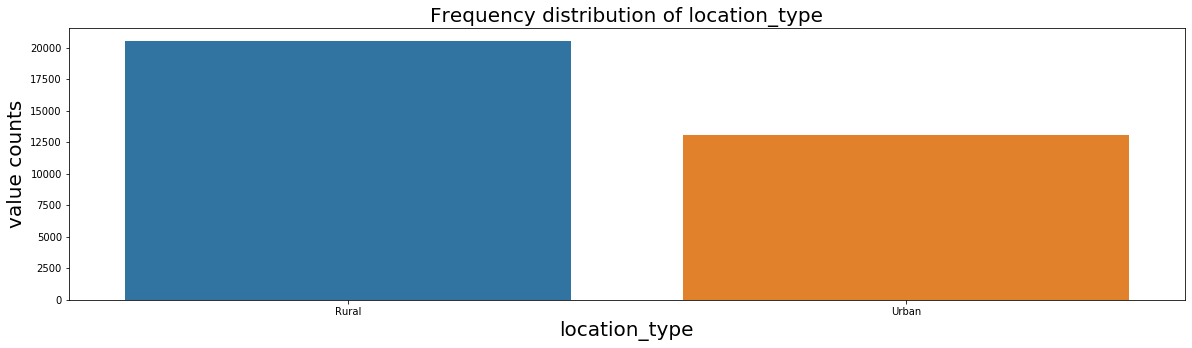

In [56]:
cat_plot('location_type')

## 7. Marital Status

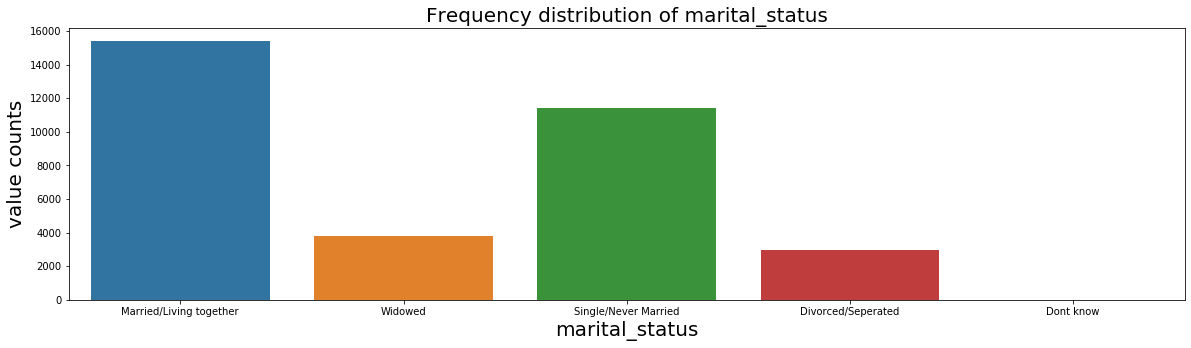

In [57]:
cat_plot('marital_status')

## 8. Relationship with Head

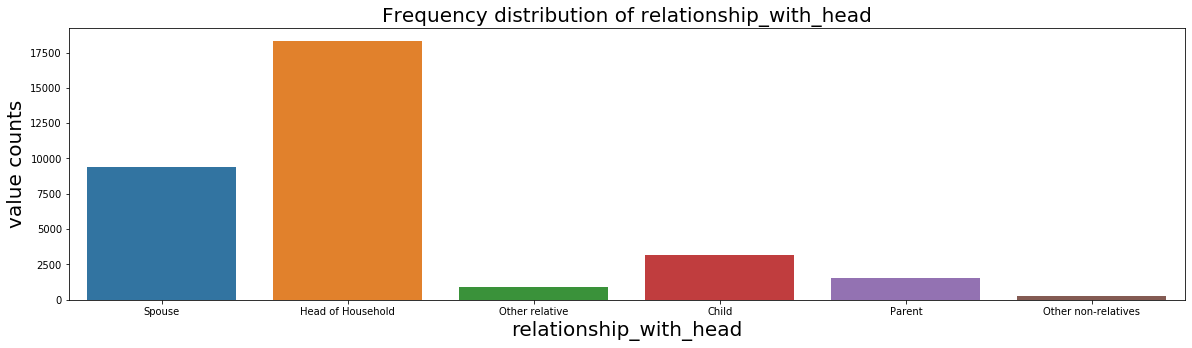

In [58]:
cat_plot('relationship_with_head')

In [59]:
# encode the integer columns by their frequency 
int_col=['age_of_respondent','household_size','year']
for col in int_col:
    freq = data[col].value_counts().to_dict()
    data[col + '_freq_encode'] = data[col].map(freq)

In [60]:
data["age_div_hs"]=data.age_of_respondent/data.household_size
data["age_sub_hs"]=data.age_of_respondent-data.household_size
data["log10_age"]=data.age_of_respondent/10
data["log100_age"]=data.age_of_respondent/100
data["agevsdiv_hs"]=data.age_of_respondent-data.age_div_hs
data["agevssub_hs"]=data.age_of_respondent-data.age_sub_hs
data["log10vslog100"]=data.log10_age-data.log100_age
data["Agelog"]=data.agevsdiv_hs-data.log10vslog100
data["log10_household"]=data.log10_age-data.household_size
data["agelog10"]=data.age_of_respondent-data.log10_age
data["year_log10"]=data.year/10
data["year_log100"]=data.year/100
data["year_age"]=data.year-data.age_of_respondent
data["yearage2"]=data.year/data.age_of_respondent
data["yearhousehold"]=data.year/data.household_size

In [61]:
data.head()

,age_of_respondent,bank_account,cellphone_access,country,education_level,gender_of_respondent,household_size,job_type,location_type,marital_status,relationship_with_head,year,age_of_respondent_freq_encode,household_size_freq_encode,year_freq_encode,age_div_hs,age_sub_hs,log10_age,log100_age,agevsdiv_hs,agevssub_hs,log10vslog100,Agelog,log10_household,agelog10,year_log10,year_log100,year_age,yearage2,yearhousehold
0,24,Yes,Yes,Kenya,Secondary education,Female,3,Self employed,Rural,Married/Living together,Spouse,2018,826,5558,11671,8.00,21,2.4,0.24,16.00,3,2.16,13.84,-0.6,21.6,201.8,20.18,1994,84.083333,672.666667
1,70,No,No,Kenya,No formal education,Female,5,Government Dependent,Rural,Widowed,Head of Household,2018,396,4135,11671,14.00,65,7.0,0.70,56.00,5,6.30,49.70,2.0,63.0,201.8,20.18,1948,28.828571,403.600000
2,26,Yes,Yes,Kenya,Vocational/Specialised training,Male,5,Self employed,Urban,Single/Never Married,Other relative,2018,854,4135,11671,5.20,21,2.6,0.26,20.80,5,2.34,18.46,-2.4,23.4,201.8,20.18,1992,77.615385,403.600000
3,34,No,Yes,Kenya,Primary education,Female,5,Formally employed Private,Rural,Married/Living together,Head of Household,2018,754,4135,11671,6.80,29,3.4,0.34,27.20,5,3.06,24.14,-1.6,30.6,201.8,20.18,1984,59.352941,403.600000
4,26,No,No,Kenya,Primary education,Male,8,Informally employed,Urban,Single/Never Married,Child,2018,854,1072,11671,3.25,18,2.6,0.26,22.75,8,2.34,20.41,-5.4,23.4,201.8,20.18,1992,77.615385,252.250000


In [62]:
data.corr()

,age_of_respondent,household_size,year,age_of_respondent_freq_encode,household_size_freq_encode,year_freq_encode,age_div_hs,age_sub_hs,log10_age,log100_age,agevsdiv_hs,agevssub_hs,log10vslog100,Agelog,log10_household,agelog10,year_log10,year_log100,year_age,yearage2,yearhousehold
age_of_respondent,1.000000,-0.126141,-0.025300,-0.717979,0.056644,0.023775,0.599205,0.991421,1.000000,1.000000,0.531008,-0.126141,1.000000,0.449283,0.657621,1.000000,-0.025300,-0.025300,-0.998680,-0.903362,0.157710
household_size,-0.126141,1.000000,-0.054672,0.056714,-0.801007,0.406338,-0.631358,-0.254725,-0.126141,-0.126141,0.521259,1.000000,-0.126141,0.563517,-0.830285,-0.126141,-0.054672,-0.054672,0.123002,0.106416,-0.795550
year,-0.025300,-0.054672,1.000000,0.043809,0.009545,-0.295334,0.076292,-0.017458,-0.025300,-0.025300,-0.110228,-0.054672,-0.025300,-0.113418,0.027304,-0.025300,1.000000,1.000000,0.076618,0.040064,0.126919
age_of_respondent_freq_encode,-0.717979,0.056714,0.043809,1.000000,-0.012976,-0.035305,-0.424032,-0.707359,-0.717979,-0.717979,-0.387798,0.056714,-0.717979,-0.329476,-0.446450,-0.717979,0.043809,0.043809,0.718349,0.524429,-0.086644
household_size_freq_encode,0.056644,-0.801007,0.009545,-0.012976,1.000000,-0.394121,0.259311,0.160759,0.056644,0.056644,-0.208457,-0.801007,0.056644,-0.226042,0.640121,0.056644,0.009545,0.009545,-0.056005,-0.045327,0.365253
year_freq_encode,0.023775,0.406338,-0.295334,-0.035305,-0.394121,1.000000,-0.239444,-0.030364,0.023775,0.023775,0.281136,0.406338,0.023775,0.293777,-0.295221,0.023775,-0.295334,-0.295334,-0.038889,-0.023925,-0.373124
age_div_hs,0.599205,-0.631358,0.076292,-0.424032,0.259311,-0.239444,1.000000,0.667294,0.599205,0.599205,-0.360216,-0.631358,0.599205,-0.446032,0.816112,0.599205,0.076292,0.076292,-0.593714,-0.499909,0.822412
age_sub_hs,0.991421,-0.254725,-0.017458,-0.707359,0.160759,-0.030364,0.667294,1.000000,0.991421,0.991421,0.448944,-0.254725,0.991421,0.363711,0.750449,0.991421,-0.017458,-0.017458,-0.989720,-0.894619,0.258560
log10_age,1.000000,-0.126141,-0.025300,-0.717979,0.056644,0.023775,0.599205,0.991421,1.000000,1.000000,0.531008,-0.126141,1.000000,0.449283,0.657621,1.000000,-0.025300,-0.025300,-0.998680,-0.903362,0.157710
log100_age,1.000000,-0.126141,-0.025300,-0.717979,0.056644,0.023775,0.599205,0.991421,1.000000,1.000000,0.531008,-0.126141,1.000000,0.449283,0.657621,1.000000,-0.025300,-0.025300,-0.998680,-0.903362,0.157710


In [63]:
d1=pd.get_dummies(data['country'], drop_first=True)
d2=pd.get_dummies(data['year'], drop_first=True)
d3=pd.get_dummies(data['location_type'], drop_first=True)
d4=pd.get_dummies(data['cellphone_access'], drop_first=True)
d5=pd.get_dummies(data['gender_of_respondent'], drop_first=True)
d6=pd.get_dummies(data['relationship_with_head'], drop_first=True)
d7=pd.get_dummies(data['marital_status'], drop_first=True)
d8=pd.get_dummies(data['education_level'], drop_first=True)
d9=pd.get_dummies(data['job_type'], drop_first=True)
#
data["bank_account"] = pd.get_dummies(data['bank_account'], columns=['bank_account'], prefix=['bank_account'], 
                                          drop_first=True)

In [64]:
data.drop(['country', 'year', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 
          'marital_status', 'education_level', 'job_type'], axis=1, inplace=True)
#
data=pd.concat([data, d1, d2, d3, d4, d5, d6, d7, d8, d9], axis=1)
data.head()

,age_of_respondent,bank_account,household_size,age_of_respondent_freq_encode,household_size_freq_encode,year_freq_encode,age_div_hs,age_sub_hs,log10_age,log100_age,agevsdiv_hs,agevssub_hs,log10vslog100,Agelog,log10_household,agelog10,year_log10,year_log100,year_age,yearage2,yearhousehold,Rwanda,Tanzania,Uganda,2017,...,Yes,Male,Head of Household,Other non-relatives,Other relative,Parent,Spouse,Dont know,Married/Living together,Single/Never Married,Widowed,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,24,1,3,826,5558,11671,8.00,21,2.4,0.24,16.00,3,2.16,13.84,-0.6,21.6,201.8,20.18,1994,84.083333,672.666667,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,70,0,5,396,4135,11671,14.00,65,7.0,0.70,56.00,5,6.30,49.70,2.0,63.0,201.8,20.18,1948,28.828571,403.600000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,26,1,5,854,4135,11671,5.20,21,2.6,0.26,20.80,5,2.34,18.46,-2.4,23.4,201.8,20.18,1992,77.615385,403.600000,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,34,0,5,754,4135,11671,6.80,29,3.4,0.34,27.20,5,3.06,24.14,-1.6,30.6,201.8,20.18,1984,59.352941,403.600000,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,26,0,8,854,1072,11671,3.25,18,2.6,0.26,22.75,8,2.34,20.41,-5.4,23.4,201.8,20.18,1992,77.615385,252.250000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [65]:
split_index=train.shape[0] #all index observations in the train dataframe
train=data[:split_index]
test=data[split_index:]
test.drop('bank_account', axis=1, inplace=True)

In [66]:
X=train.drop('bank_account',axis = 1)
y=train.bank_account

In [67]:
# train validation split
import random
random.seed(1234)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape, 'y_train: ', y_train.shape, 'y_test: ', y_test.shape)

X_train:  (16466, 51) X_test:  (7058, 51) y_train:  (16466,) y_test:  (7058,)


## CatBoost Classifier

In [68]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=200, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', 
                       eval_metric='AUC', random_seed=42)
cat.fit(X_train, y_train)
#
# Predicting the Test set results
y_pred = cat.predict(X_test)
# metric accuracy
import sklearn
sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0:	total: 54.9ms	remaining: 10.9s
1:	total: 81.4ms	remaining: 8.06s
2:	total: 110ms	remaining: 7.19s
3:	total: 140ms	remaining: 6.84s
4:	total: 168ms	remaining: 6.57s
5:	total: 203ms	remaining: 6.57s
6:	total: 239ms	remaining: 6.59s
7:	total: 284ms	remaining: 6.81s
8:	total: 316ms	remaining: 6.7s
9:	total: 344ms	remaining: 6.53s
10:	total: 387ms	remaining: 6.65s
11:	total: 424ms	remaining: 6.64s
12:	total: 449ms	remaining: 6.46s
13:	total: 482ms	remaining: 6.4s
14:	total: 509ms	remaining: 6.28s
15:	total: 538ms	remaining: 6.19s
16:	total: 564ms	remaining: 6.08s
17:	total: 595ms	remaining: 6.02s
18:	total: 647ms	remaining: 6.17s
19:	total: 676ms	remaining: 6.08s
20:	total: 702ms	remaining: 5.99s
21:	total: 730ms	remaining: 5.91s
22:	total: 761ms	remaining: 5.85s
23:	total: 811ms	remaining: 5.94s
24:	total: 841ms	remaining: 5.89s
25:	total: 872ms	remaining: 5.83s
26:	total: 900ms	remaining: 5.77s
27:	total: 930ms	remaining: 5.71s
28:	total: 960ms	remaining: 5.66s
29:	total: 987ms	remaini

0.8876452252762822

In [69]:
sample_sub=pd.read_csv('SubmissionFile.csv')
sample_sub.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [70]:
cat_pred = cat.predict(test)

In [71]:
test_copy['unique_id'] = test_copy[['uniqueid','country']].apply(lambda x: ' x '.join(x), axis=1)
submission=pd.DataFrame()
submission['unique_id']=test_copy['unique_id']
submission['bank_account'] = cat_pred.reshape((cat_pred.shape[0]))
submission.to_csv('catboost_submit.csv',index=False)

In [73]:
file1=pd.read_csv('catboost_submit.csv')
file1.head()

,unique_id,bank_account
0,uniqueid_6056 x Kenya,1.0
1,uniqueid_6060 x Kenya,1.0
2,uniqueid_6065 x Kenya,0.0
3,uniqueid_6072 x Kenya,0.0
4,uniqueid_6073 x Kenya,0.0


## RandomForest Classifier 

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
#
rf_pred=rf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))

Accuracy: 0.8719183904788892


In [75]:
rf_pred = rf.predict(test)

In [76]:
test_copy['unique_id'] = test_copy[['uniqueid','country']].apply(lambda x: ' x '.join(x), axis=1)
submit=pd.DataFrame()
submit['unique_id']=test_copy['unique_id']
submit['bank_account'] = rf_pred.reshape((rf_pred.shape[0]))
submit.to_csv('rf_submit.csv',index=False)

In [77]:
file2=pd.read_csv('rf_submit.csv')
file2.head()

,unique_id,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
